In [1]:
import gym
import numpy as np
import plotting
#import itertools
import pandas as pd
import matplotlib

from collections import defaultdict
matplotlib.style.use('ggplot')

In [2]:
env= gym.make('WindyGridworld-v0')

In [3]:
action_mappings = {
    0: '\u2191', #up
    1: '\u2192', #right 
    2: '\u2193',  #down
    3: '\u2190',  #left
}

In [4]:
def gridplotter(policy):
    a=0
    control=0
    start_state= env.reset()
    print(" %d is the Start State" % start_state)
    for state in policy:
        while control != state :
            print("*"+"  ", end='')
            control +=1
        
        if int(state/10) > a:
            print("\n")
            a+=1
            
        print(action_mappings[np.argmax(policy[state])] + "  ", end='')
        control += 1

In [5]:
def epsilon_greedy_policy(observation , Q, epsilon, nA):
    A= np.ones(nA, dtype= float) * epsilon / nA
    best_action = np.argmax(Q[observation])
    A[best_action] += (1-epsilon)
    return A

In [6]:
def sarsa_lambda_control(env, n_episodes , epsilon, discount_factor, alpha, lamda ):
    
    Q = defaultdict(lambda : np.zeros(env.action_space.n))
    #eligibility_traces = defaultdict(lambda : np.zeros(env.action_space.n))
    final_policy = defaultdict(lambda : np.zeros(env.action_space.n))
    stats = plotting.EpisodeStats(episode_lengths=np.zeros(n_episodes),episode_rewards=np.zeros(n_episodes))
    
    for i in range(n_episodes):
        eligibility_trace = defaultdict(float)
        state=env.reset()
        done = False
        prob = epsilon_greedy_policy( state, Q, epsilon, env.action_space.n)
        action= np.random.choice(np.arange(len(prob)), p=prob)
        
        while not done:
            next_state, reward, done, _ = env.step(action)
            next_prob = epsilon_greedy_policy(next_state, Q, epsilon, env.action_space.n)
            next_action = np.random.choice(np.arange(len(next_prob)), p=next_prob)
            
            eligibility_trace[(state,action)] +=1
            td_error = reward + discount_factor * Q[next_state][next_action] - Q[state][action]
            
            for _state_, _action_ in eligibility_trace:
                Q[_state_][_action_] += alpha * eligibility_trace[(_state_,_action_)] * td_error
                eligibility_trace[(_state_,_action_)] *= discount_factor * lamda
            
            stats.episode_rewards[i] += reward
            stats.episode_lengths[i] += 1
            
            state=next_state
            action = next_action
        
    for _state in Q:
        final_policy[_state]= epsilon_greedy_policy( _state, Q, 0.0 , env.action_space.n)
    
    return Q, final_policy , stats

In [7]:
Q,policy, stats = sarsa_lambda_control( env, n_episodes=200, epsilon=0.1,
                                              discount_factor = 1.0, alpha = 0.1, lamda= 0.9 )

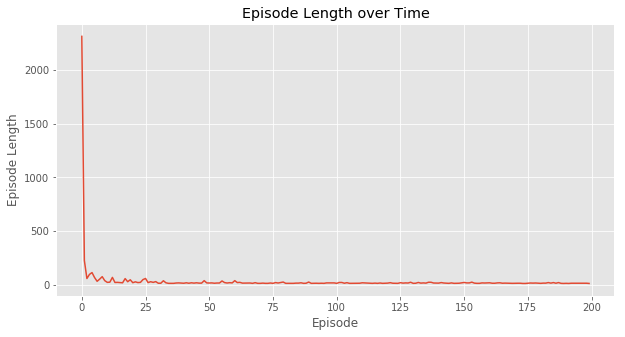

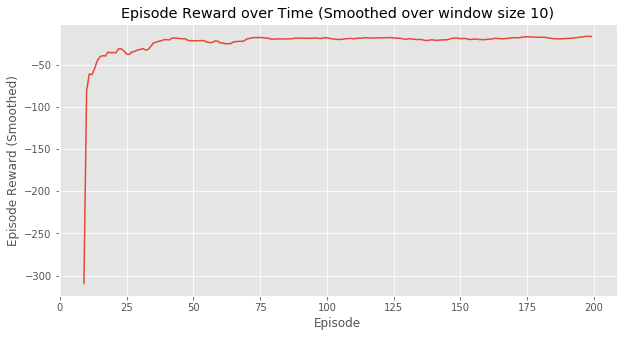

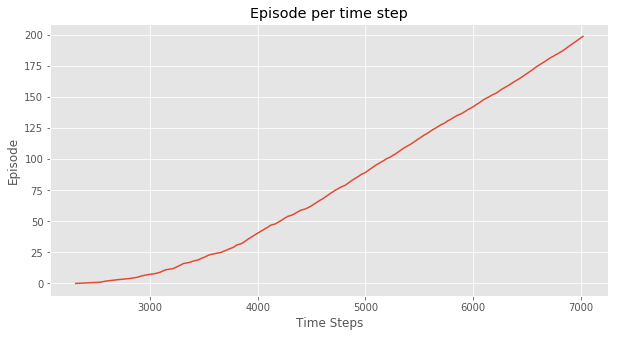

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [8]:
plotting.plot_episode_stats(stats)

In [9]:
gridplotter(policy)

 30 is the Start State
→  →  →  →  →  →  →  →  →  ↓  

→  ↑  →  →  ←  →  ↓  ↑  ←  ↓  

→  ↓  →  ↑  →  ↑  *  ↓  →  ↓  

→  →  →  →  ←  →  →  ↑  →  ↓  

→  →  →  →  ↑  ↑  *  →  ←  ←  

←  ←  →  ↑  ←  *  *  *  →  ↓  

→  →  ←  →  *  *  *  *  ↓  ↑  

# Points to be noted down:

Sarsa(lambda) is clearly better than Sarsa(0) . This can be said by observing the graphs.
 Try experimenting by changing values of constants. Thats very important.